# Installing Dependencies

In [163]:
!pip install xgboost

import pandas as pd #data preprocessing
import numpy as np #math operations
from sklearn.preprocessing import StandardScaler #scaling
from sklearn.preprocessing import LabelEncoder #encoding
from sklearn.model_selection import GridSearchCV #hyperparameter optimization
from sklearn.model_selection import train_test_split #train-test 
from sklearn.svm import NuSVR, SVR #support vector machine model
from xgboost import XGBClassifier, plot_importance #xgboost classifier
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, classification_report 

You should consider upgrading via the 'c:\users\pavilion\anaconda3\python.exe -m pip install --upgrade pip' command.


# Importing dataset

In [164]:
train = pd.read_csv('train_file.csv')
num_columns = len(train.columns)
pd.set_option("display.max_columns", num_columns)
train.head(10)

C:\Users\Pavilion\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
5,2129534-20111129,2129534,368042,1,QUALITY PLUMBING SERVICES INC.,QUALITY PLUMBING SERVICES INC.,251 OAKWOOD DR,WOOD DALE,IL,60191,NaN,NaN,NaN,NaN,1010,Limited Business License,2129534.0,ISSUE,NaN,2011-11-28T00:00:00,2011-11-28T00:00:00,N,2011-11-29T00:00:00,2013-12-15T00:00:00,2011-11-28T00:00:00,2011-11-29T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
6,1275083-20040216,1455178,36211,2,FELIX BARRERA,BARRERA CONSTRUCTION,318 N FOREST,HILLSIDE,IL,60162,NaN,NaN,NaN,NaN,1010,Limited Business License,1275083.0,RENEW,NaN,2003-12-15T00:00:00,2005-02-15T00:00:00,N,2004-02-16T00:00:00,2005-02-15T00:00:00,2003-12-22T00:00:00,2005-02-15T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
7,1223497-20030816,1375248,230124,1,INTERSTATE MECHANICAL & CONSTRUCTION INC,INTERSTATE MECHANICAL & CONSTRUCTION INC,1850 S CANAL ST,CHICAGO,IL,60616,25.0,6.0,25-Jun,12.0,1010,Limited Business License,1223497.0,RENEW,NaN,2003-06-24T00:00:00,2003-08-06T00:00:00,N,2003-08-16T00:00:00,2004-08-15T00:00:00,2003-08-06T00:00:00,2003-08-07T00:00:00,2004-05-04T00:00:00,NaN,41.856222,-87.639032,"{'latitude': '41.856222490735874', 'longitude'...",AAC
8,1222096-20020124,1222096,223263,1,LESLIE LOCKETT,DELUXE CUSTOM SERVICES,20132 DOLPHIN AVE,LYNWOOD,IL,60411,NaN,NaN,NaN,NaN,1011,Home Repair,1222096.0,ISSUE,2002-01-14T00:00:00,2002-01-23T00:00:00,2002-01-23T00:00:00,N,2002-01-24T00:00:00,2003-02-15T00:00:00,2002-01-24T00:00:00,2002-01-24T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
9,1197714-20020809,1197714,86252,3,JOY CHEMMACHEL,FULLERTON PULASKI SHELL,3959 W FULLERTON AVE 1,CHICAGO,IL,60647,35.0,999.0,35-999,25.0,1569,Motor Vehicle Repair : Engine Only (Class II),1197714.0,ISSUE,2001-12-13T00:00:00,2002-01-16T00:00:00,2002-01-16T00:00:00,N,2002-08-09T00:00:00,2002-08-15T00:00

In [235]:
test = pd.read_csv('test_file.csv')
num_col = len(test.columns)
pd.set_option("display.max_columns", num_col)
test.head(10)

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,NaN,2011-12-15T00:00:00,2012-01-19T00:00:00,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,NaN,2011-04-15T00:00:00,2012-11-02T00:00:00,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,NaN,2004-09-27T00:00:00,2004-12-06T00:00:00,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,NaN,2010-06-15T00:00:00,2010-11-04T00:00:00,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,NaN,2007-06-21T00:00:00,2007-08-15T00:00:00,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."
5,1914726-20111216,2123845,333231,3,"VCNA PRAIRIE ILLINOIS, INC.",PRAIRIE MATERIAL,3316 N KEDZIE AVE,CHICAGO,IL,60618.0,35.0,24.0,35-24,17.0,1008,Hazardous Materials,1914726.0,RENEW,NaN,2011-10-14T00:00:00,2011-12-12T00:00:00,N,2011-12-16T00:00:00,2013-12-15T00:00:00,2011-12-12T00:00:00,2011-12-12T00:00:00,2012-08-07T00:00:00,NaN,41.941541,-87.707830,"{'latitude': '41.941541405646134', 'longitude'..."
6,81899-20110916,2105373,49375,1,LORENZO'S HAIR DESIGN & INC,LORENZO'S HAIR DESIGN & INC,5345 N HARLEM AVE 1ST,CHICAGO,IL,60656.0,41.0,62.0,41-62,16.0,1010,Limited Business License,81899.0,RENEW,NaN,2011-07-15T00:00:00,2011-09-14T00:00:00,N,2011-09-16T00:00:00,2013-09-15T00:00:00,2011-09-14T00:00:00,2011-09-15T00:00:00,NaN,NaN,41.978405,-87.806849,"{'latitude': '41.97840506727598', 'longitude':..."
7,2088957-20110808,2088957,361131,1,NOHELIA CASILLAS,IMPERIAL DESIGN HOME IMPROVEMENT,10119 S AVENUE L,CHICAGO,IL,60617.0,10.0,26.0,10-26,4.0,1011,Home Repair,2088957.0,ISSUE,2011-04-05T00:00:00,2011-08-08T00:00:00,2011-08-08T00:00:00,N,2011-08-08T00:00:00,2013-08-15T00:00:00,2011-08-08T00:00:00,2011-08-08T00:00:00,2012-12-29T00:00:00,NaN,41.711381,-87.536342,"{'latitude': '41.711381072052276', 'longitude'..."
8,1518838-20090316,1949708,22232,44,BLOCKBUSTER INC.,BLOCKBUSTER VIDEO #17394,1704 N MILWAUKEE AVE,CHICAGO,IL,60647.0,32.0,2.0,32-2,14.0,1683,Secondhand Dealer,1518838.0,RENEW,NaN,2009-01-15T00:00:00,2009-03-24T00:00:00,N,2009-03-16T00:00:00,2011-03-15T00:00:00,2009-04-03T00:00:00,2009-04-06T00:00:00,2011-03-11T00:00:00,33.0,41.912273,-87.680

In [237]:
final_submission = pd.DataFrame({'ID' : test.ID})

# Data Preprocessing

In [238]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [239]:
train['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

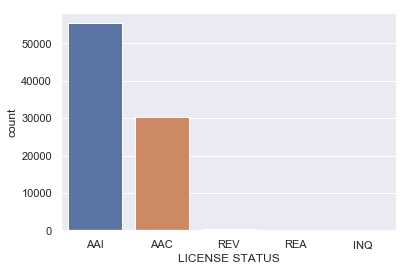

In [240]:
sns.countplot(train['LICENSE STATUS'])
plt.show()

In [241]:
#drop columns, due to major NaN values in these columns, also taking mean won't help in this scenario 
drop_col_list = ['LICENSE ID','ID','LOCATION','SSA','ADDRESS','APPLICATION CREATED DATE']
new_train_data = train.drop(drop_col_list, axis=1)
new_test_data = test.drop(drop_col_list, axis=1)

In [242]:
#computing missing values by mean
def compute_mean(mean_list):
    for i in mean_list:
        new_train_data[i] = new_train_data[i].fillna(new_train_data[i].mean())
        new_test_data[i] = new_test_data[i].fillna(new_test_data[i].mean()) 
mean_list = ['LATITUDE', 'LONGITUDE']
compute_mean(mean_list)

In [243]:
#compute year and month from datetime
def convert_date(date_list):
    for i in date_list:
        new_train_data[i] = pd.to_datetime(new_train_data[i])
        new_test_data[i] = pd.to_datetime(new_test_data[i])
date_list = ['APPLICATION REQUIREMENTS COMPLETE','PAYMENT DATE','LICENSE TERM START DATE',
            'LICENSE TERM EXPIRATION DATE','LICENSE APPROVED FOR ISSUANCE','DATE ISSUED','LICENSE STATUS CHANGE DATE']
convert_date(date_list)

In [244]:
#drop columns
col_list = ['APPLICATION REQUIREMENTS COMPLETE','PAYMENT DATE','LICENSE TERM START DATE',
            'LICENSE TERM EXPIRATION DATE','LICENSE APPROVED FOR ISSUANCE','DATE ISSUED','LICENSE STATUS CHANGE DATE']
new_train_data = new_train_data.drop(col_list, axis=1) 
new_test_data = new_test_data.drop(col_list, axis=1)

In [245]:
new_train_data['LEGAL NAME'].apply(lambda x: x.upper())
new_test_data['LEGAL NAME'].apply(lambda x: x.upper())

0                           RS HOMES I LLC
1                       CSX INTERMODAL INC
2                    LOCOMIBILE  LOFTS LLC
3                          ANNA F. JAMISON
4                   MARINCA A. COVARRUBIAS
                       ...                
57234    GOODHEALTH MEDICAL PRODUCTS, INC.
57235                        INTERPARK LLC
57236                        YUN HEE HWANG
57237         D. C. A. TOWING INCORPORATED
57238                        MARIA T BEDOY
Name: LEGAL NAME, Length: 57239, dtype: object

In [246]:
#drop columns
col_list = ['LEGAL NAME', 'DOING BUSINESS AS NAME']
new_train_data = new_train_data.drop(col_list, axis=1) 
new_test_data = new_test_data.drop(col_list, axis=1)

In [247]:
new_train_data.shape

(85895, 17)

In [248]:
new_test_data.shape

(57239, 16)

In [249]:
new_test_data['LICENSE DESCRIPTION'].value_counts()

Limited Business License           28094
Retail Food Establishment           4788
Home Occupation                     3021
Tobacco                             2426
Home Repair                         1860
                                   ...  
Repossessor Class A                    1
License Manager                        1
Shared Housing Unit Operator           1
Transportation Network Provider        1
Food - Shared Kitchen                  1
Name: LICENSE DESCRIPTION, Length: 124, dtype: int64

In [250]:
#compute with 0
def compute_zero(z_list):
    for i in z_list:
        new_train_data[i] = new_train_data[i].fillna(0)
        new_test_data[i] = new_test_data[i].fillna(0)

In [251]:
z_list = ['WARD','WARD PRECINCT','PRECINCT','LICENSE NUMBER','POLICE DISTRICT','ZIP CODE']
compute_zero(z_list)

In [252]:
#compute count of missing values in each column
new_test_data.isna().sum()

ACCOUNT NUMBER          0
SITE NUMBER             0
CITY                    0
STATE                   0
ZIP CODE                0
WARD                    0
PRECINCT                0
WARD PRECINCT           0
POLICE DISTRICT         0
LICENSE CODE            0
LICENSE DESCRIPTION     0
LICENSE NUMBER          0
APPLICATION TYPE        0
CONDITIONAL APPROVAL    0
LATITUDE                0
LONGITUDE               0
dtype: int64

# Encoding the Categorical data

In [253]:
new_train_data.rename(columns = {'LICENSE STATUS':'LICENSE_STATUS'}, inplace = True)
new_test_data.rename(columns = {'LICENSE STATUS':'LICENSE_STATUS'}, inplace = True)

In [254]:
license_status = {'AAI':0, 'AAC':1, 'REV':2, 'REA':3, 'INQ':4}
new_train_data.LICENSE_STATUS = [license_status[item] for item in new_train_data.LICENSE_STATUS]
print(new_train_data)

       ACCOUNT NUMBER  SITE NUMBER            CITY STATE ZIP CODE  WARD  \
0               32811            1         CHICAGO    IL    60623  22.0   
1              262311           29         CHICAGO    IL    60618  33.0   
2              345008            1        HIGHLAND    IL    60035   0.0   
3              273121            1          LEMONT    IL    60439   0.0   
4              213785            1        WAUKEGAN    IL    60087   0.0   
...               ...          ...             ...   ...      ...   ...   
85890            8011            1         CHICAGO    IL    60607  11.0   
85891          317725            1  MACHESNEY PARK    IL    61115   0.0   
85892            8458            2   DOWNERS GROVE    IL    60515   0.0   
85893            2156           43         CHICAGO    IL    60632  23.0   
85894          205936            1         CHICAGO    IL    60639  30.0   

       PRECINCT WARD PRECINCT  POLICE DISTRICT  LICENSE CODE  \
0          28.0         22-28      

In [255]:
encoder = LabelEncoder()
new_train_data['WARD PRECINCT'] = encoder.fit_transform(new_train_data['WARD PRECINCT'].astype(str)) 
new_test_data['WARD PRECINCT'] = encoder.fit_transform(new_test_data['WARD PRECINCT'].astype(str))

new_train_data['ZIP CODE'] = encoder.fit_transform(new_train_data['ZIP CODE'].astype(str)) 
new_test_data['ZIP CODE'] = encoder.fit_transform(new_test_data['ZIP CODE'].astype(str))

In [256]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ACCOUNT NUMBER        85895 non-null  int64  
 1   SITE NUMBER           85895 non-null  int64  
 2   CITY                  85895 non-null  object 
 3   STATE                 85895 non-null  object 
 4   ZIP CODE              85895 non-null  int64  
 5   WARD                  85895 non-null  float64
 6   PRECINCT              85895 non-null  float64
 7   WARD PRECINCT         85895 non-null  int64  
 8   POLICE DISTRICT       85895 non-null  float64
 9   LICENSE CODE          85895 non-null  int64  
 10  LICENSE DESCRIPTION   85895 non-null  object 
 11  LICENSE NUMBER        85895 non-null  float64
 12  APPLICATION TYPE      85895 non-null  object 
 13  CONDITIONAL APPROVAL  85895 non-null  object 
 14  LATITUDE              85895 non-null  float64
 15  LONGITUDE          

In [257]:
#encoding features with non-numerical data
def encode_data(df):
    for j in df.columns:
        if df[j].dtype == 'object':
            m = ~df[j].isnull()
            encoder = LabelEncoder()
            try:
                df[j][m] = encoder.fit_transform(df[j][m])
                df[j] = df[j].astype(int)
            except Exception as err:
                print(err)
    return df

In [258]:
encode_data(new_train_data)
encode_data(new_test_data)

C:\Users\Pavilion\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE
0,280120,1,59,13,256,42.0,67.0,1771,18.0,1020,93,1516615.0,5,0,41.890047,-87.637467
1,65043,1,59,13,281,16.0,5.0,339,7.0,1010,53,69813.0,5,0,41.786485,-87.676665
2,281270,1,59,13,251,4.0,8.0,1624,1.0,1020,93,1519227.0,5,0,41.868269,-87.625695
3,335243,1,59,13,312,9.0,33.0,2430,5.0,1607,80,1922025.0,5,0,41.655762,-87.608686
4,283018,3,59,13,277,15.0,26.0,278,9.0,1010,53,1675683.0,5,0,41.816969,-87.699785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57234,266103,3,59,13,295,18.0,14.0,406,8.0,1010,53,1743194.0,5,0,41.749842,-87.688733
57235,63376,180,59,13,297,42.0,22.0,1741,18.0,1002,0,2032383.0,5,0,41.891055,-87.627898
57236,55051,1,59,13,300,44.0,9.0,1883,19.0,1010,53,40376.0,5,0,41.943382,-87.659191
57237,357381,1,59,13,283,23.0,18.0,728,8.0,1012,37,2064176.0,5,0,41.775710,-87.798009


In [259]:
# sns.pairplot(new_test_data, size=5.5)
# plt.tight_layout()

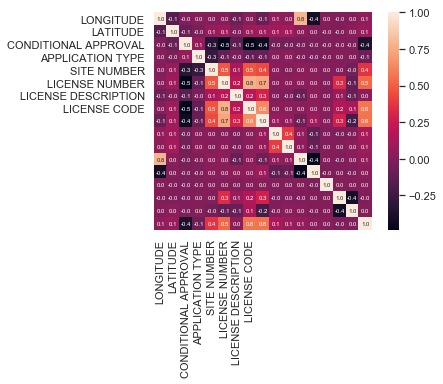

In [260]:
# Calculate and show correlation matrix: to quantify and summarize the relationships between the variables. A rescaled version of the covariance matrix, computed from standardize features.
cols = ['LONGITUDE', 'LATITUDE', 'CONDITIONAL APPROVAL', 'APPLICATION TYPE', 'SITE NUMBER', 'LICENSE NUMBER', 'LICENSE DESCRIPTION',
       'LICENSE CODE']
cm = np.corrcoef(new_train_data.values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.1f',
                annot_kws={'size': 6},
                yticklabels=cols,
                xticklabels=cols)

# Sampling the data

In [261]:
new_train_data = new_train_data.sample(frac=1)

In [262]:
# 'AAI':0, 'AAC':1, 'REV':2, 'REA':3, 'INQ':4
lic_to_be_inquired_df = new_train_data[new_train_data['LICENSE_STATUS'] == 4]
lic_to_be_revoked_df = new_train_data[new_train_data['LICENSE_STATUS'] == 3]
lic_revoked_df = new_train_data[new_train_data['LICENSE_STATUS'] == 2]
lic_cancelled_df = new_train_data[new_train_data['LICENSE_STATUS'] == 1][:290]
lic_issued_df = new_train_data[new_train_data['LICENSE_STATUS'] == 0][:300]

distributed_data = pd.concat([lic_to_be_inquired_df, lic_to_be_revoked_df, lic_revoked_df, lic_cancelled_df, lic_issued_df])
new_df = distributed_data.sample(frac=1, random_state=62)
new_df.head(10)

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE_STATUS
73384,361011,1,193,16,1520,27.0,24.0,801,11.0,1010,46,2088740.0,3,0,41.902629,-87.718387,2
45226,88611,1,193,16,1515,35.0,999.0,1203,25.0,1010,46,87109.0,4,0,41.922556,-87.725848,0
63817,392577,1,193,16,1503,45.0,26.0,1659,16.0,1006,84,2349922.0,3,0,41.960479,-87.754519,2
39883,292980,1,193,16,1503,31.0,9.0,1029,16.0,1524,49,1617172.0,3,0,41.938795,-87.757878,2
12944,355315,1,193,16,1462,9.0,50.0,2376,6.0,1010,46,2054010.0,3,0,41.723070,-87.623639,1
48806,259695,1,193,16,1486,15.0,23.0,232,9.0,1010,46,1335576.0,4,0,41.815293,-87.702517,1
18212,201721,1,193,16,1438,27.0,7.0,840,12.0,1470,92,1042466.0,4,0,41.885427,-87.654966,2
55059,85614,6,193,16,1452,2.0,51.0,2055,18.0,1010,46,2084215.0,4,0,41.912377,-87.651346,1
39609,257858,1,193,16,1520,37.0,20.0,1252,15.0,1006,84,1331319.0,4,0,41.895056,-87.754912,2
72838,341985,1,193,16,1490,36.0,0.0,1204,0.0,1010,46,1963871.0,3,0,41.938600,-87.788358,0


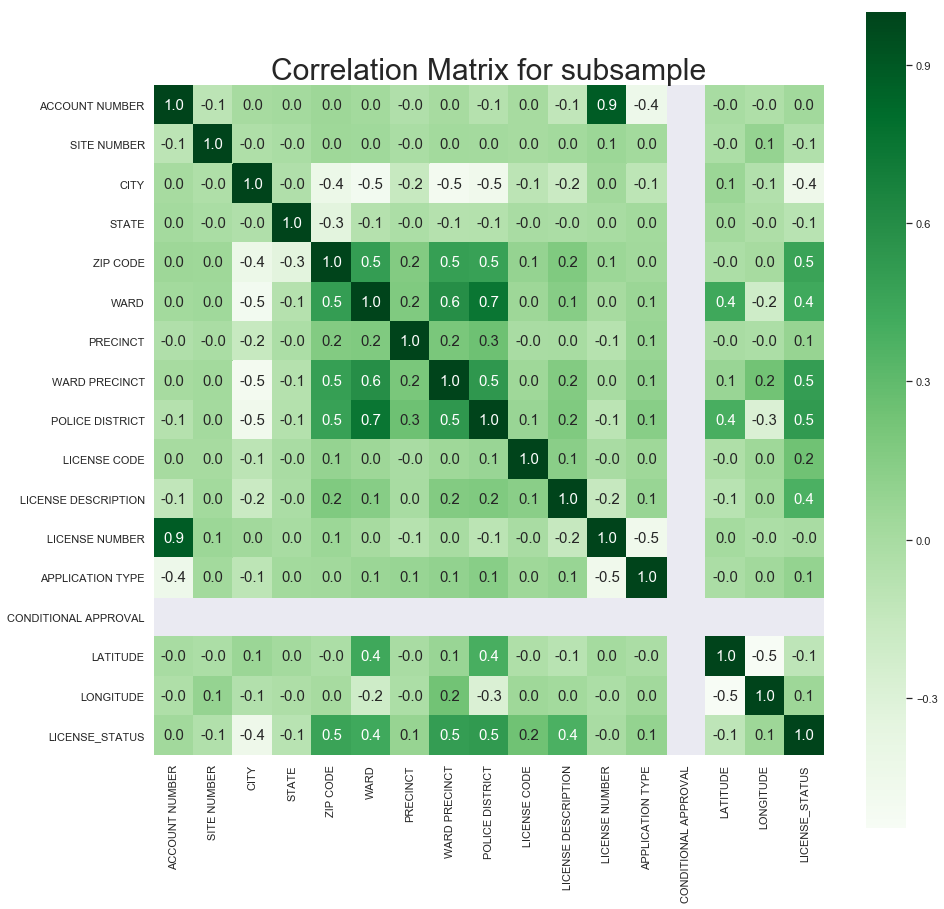

In [263]:
# Data: Subsample
ssample_corr = new_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(ssample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.title('Correlation Matrix for subsample', fontsize=30)
plt.show()

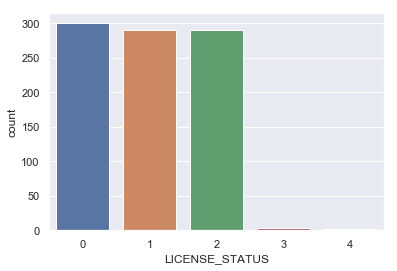

In [264]:
sns.countplot(new_df['LICENSE_STATUS'])
plt.show()

In [265]:
X = new_df.drop('LICENSE_STATUS', axis=1)
y = new_df['LICENSE_STATUS']

In [266]:
#creating training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [267]:
#computing Confusion Matrix
def compute_confusion_matrix(actual, predicted):
    cf_m = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cf_m, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('PREDICTED')
    plt.xlabel('ACTUAL')
    plt.show()   

In [268]:
#XG Boost: training the model
xgbm = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='multi:softmax', silent=True, nthread=1, num_class=5)
xgbm.fit(X_train, y_train)

C:\Users\Pavilion\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.02, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=1000, n_jobs=1, nthread=1,
       num_class=5, num_parallel_tree=1, objective='multi:softprob',
       predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=None, silent=True, subsample=1,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

In [269]:
#predicting the test data
pred_y = xgbm.predict(X_test)

#computing recall, precision and accuracy
accuracy_xgb = round( metrics.accuracy_score(y_test, pred_y) * 100 , 2 )
print( 'Accuracy : ', accuracy_xgb )

Accuracy :  76.58


C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [270]:
importance = xgbm.feature_importances_
print(max(importance))

0.22916289


Feature: 0, Score: 0.03515
Feature: 1, Score: 0.04123
Feature: 2, Score: 0.02833
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.02792
Feature: 5, Score: 0.11529
Feature: 6, Score: 0.22916
Feature: 7, Score: 0.02824
Feature: 8, Score: 0.12747
Feature: 9, Score: 0.10771
Feature: 10, Score: 0.13777
Feature: 11, Score: 0.03248
Feature: 12, Score: 0.02292
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.03705
Feature: 15, Score: 0.02929


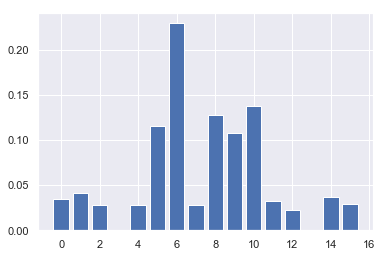

In [271]:
importance = xgbm.feature_importances_
#feature importance summarization
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

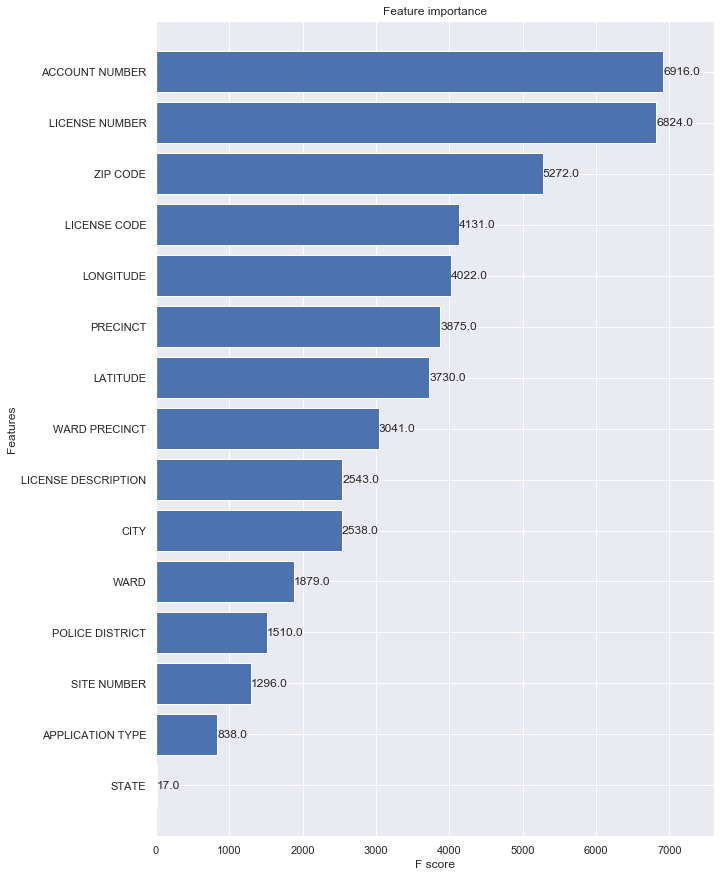

In [272]:
#feature 6,8,10 are most important 
fig, ax = plt.subplots(figsize=(10,15))
plot_importance(gbm, max_num_features=40, height=0.8, ax=ax)
plt.show()

In [273]:
xgbm.get_booster().get_score(importance_type="gain")

{'ACCOUNT NUMBER': 0.396028995513916,
 'SITE NUMBER': 0.4644571840763092,
 'CITY': 0.31914734840393066,
 'ZIP CODE': 0.3145694136619568,
 'WARD': 1.298883318901062,
 'PRECINCT': 2.5818052291870117,
 'WARD PRECINCT': 0.31816408038139343,
 'POLICE DISTRICT': 1.4360735416412354,
 'LICENSE CODE': 1.2134438753128052,
 'LICENSE DESCRIPTION': 1.5521320104599,
 'LICENSE NUMBER': 0.365911602973938,
 'APPLICATION TYPE': 0.25823503732681274,
 'LATITUDE': 0.4173992872238159,
 'LONGITUDE': 0.3299936354160309}

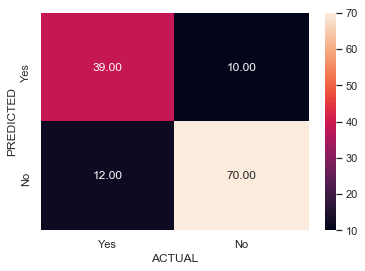

In [274]:
# result for confusion matrix 
from sklearn.metrics import confusion_matrix
compute_confusion_matrix(y_test, pred_y)

In [278]:
model_xgbm = pd.DataFrame({
    'Model': ['XG-Boost'],
    'Score': [accuracy_xgb]})
model_xgbm.sort_values(by='Score', ascending=False)

,Model,Score
0,XG-Boost,76.58


In [279]:
#test data prediction
test_pred = xgbm.predict(new_test_data)

C:\Users\Pavilion\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [286]:
final_submission['LICENSE_STATUS'] = test_pred
final_submission.rename(columns = {'LICENSE_STATUS':'LICENSE STATUS'}, inplace = True)
final_submission['LICENSE STATUS'] = final_submission['LICENSE STATUS'].replace(0, 'AAI')
final_submission['LICENSE STATUS'] = final_submission['LICENSE STATUS'].replace(1, 'AAC')
final_submission['LICENSE STATUS'] = final_submission['LICENSE STATUS'].replace(2, 'REV')
final_submission['LICENSE STATUS'] = final_submission['LICENSE STATUS'].replace(3, 'REA')
final_submission['LICENSE STATUS'] = final_submission['LICENSE STATUS'].replace(4, 'INQ')

In [287]:
#saving final predictions result 
final_submission.to_csv('submission.csv', index=False)